## Deep Learning in Python  ## pracrice

In [4]:
import numpy as np
import pandas as pd



In [24]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential


C:\Users\kavya\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Course Description ##
Deep learning is the machine learning technique behind the most exciting capabilities in diverse areas like robotics, natural language processing, image recognition and artificial intelligence (including the famous AlphaGo). In this course, you'll gain hands-on, practical knowledge of how to use deep learning with Keras 2.0, the latest version of a cutting edge library for deep learning in Python.

## 1 Basics of deep learning and neural networks ##


<img src="images/Basics_of_deep learning_and_ neural_networks.PNG" style="width:650px;height:300px;">

## Introduction
- Imagine you work for a branch, and you need to build a model predicting how many transactions each customer will make next year
- You have predicted data or features like each customer's age, Bank balance(Slide 3/47).
- Cosider how simple linear regression model works for this problem.
- The linear regression embeds an assumption that the outcome, inthis case how many transaction a user makes, is the sum of individual parts 
- it starts by saying, "What is the average?", then it adds the effect of age, then the effect of bank balance...
- The linear regression model isn't identifying the interactions between these parts, and how they effect banking activity.
- if we plot predictions from this model, we draw one line with the predictions for retired people, and another for those still working.
- the left graph shows predictions from a model with no interactions.
- in this model we simply add up the effect of the retirement status, and curent bank balance.
- the lack of interactions is reflected by both lines being parallel 
- the graph from the right shows the prediction from a mmoel that allows interactions(4/47).


## neural networks are powerful modeling approch that accounts for interactions well
## There ability to capture extremely complex interactions also allow them to do amazing things with Text, images, videos, audio, 
## All the layers that are not the input or output layers are called hidden layers, They are called hidden layers because, While the input and outputs corresponding to visible.

## the more nodes we have, the more intractons we can capture

<img src="images/Comparing neural network models to classical regression models.PNG" style="width:650px;height:300px;">

## Forward propagation
How Neural networks use data to make predictions ?
- Predicting how many trasactions a user will make at our bank.
- We'll make predictions based on only the number of children and number of existing acounts.
- the forward propagation algorithm will pass this information through the network to make a prediction in the output layer.
- lines connect the inputs to the hidden layer
- Each line has a weight indicating how strongly that input effect the hidden node that the line ends at.
- we have one weight from the top input into the top node of the layer and one weight from the bottom input to the top node pf the hiddden layer.

## weights
    - these weights are the parameter, we train or change when we fit a neural network to data.

## we do forward propagation for one data point at a time



## Coding the forward propagation algorithm
In this exercise, you'll write code to do forward propagation (prediction) for your first neural network:

<img src="images/middle1.PNG" style="width:650px;height:300px;">

## Each data point is a customer. 
- The first input is how many accounts they have.
- The second input is how many children they have. 
- The model will predict how many transactions the user makes in the next year.




## Instructions

- Calculate the value in node 0 by multiplying input_data by its weights weights['node_0'] and computing their sum. This is the 1st node in the hidden layer.
- Calculate the value in node 1 using input_data and weights['node_1']. This is the 2nd node in the hidden layer.
- Put the hidden layer values into an array. This has been done for you.
- Generate the prediction by multiplying hidden_layer_outputs by weights['output'] and computing their sum.


In [31]:
input_data           = np.array([3, 5])
weights              = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}
weights['node_0']    = np.array([2, 4])
weights['node_1']    = np.array([ 4, -5])
weights['output']    = np.array([2, 7])


In [32]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0'] ).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1'] ).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output'] ).sum()

# Print output
print(output)



-39


## Activation functions 
But creating this multiply-add-process is only half the story for hidden layers
- For neural networks to achive their maximum predictive power, we must apply something called an activation function in the hidden layer
- An activation function allowsx the model to capture non-linearities.
- Non-linearities, capture patterns like how going from one children to two children may impact your banking ranscations from going from 3 to 4.


<img src="images/linear_vs_nonlinear.PNG" style="width:650px;height:300px;">

If the relationship in the data aren't a straight-line relationship, we need an activation function that captures the non-linearities.

An activation function is something applied to the value coming into a node, which then transformed it into the value stored in ouput node 

## The Rectified Linear Activation Function
- An "activation function" is a function applied at each node. It converts the node's input into some output.

- The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.


Here are some examples:
relu(3) = 3 
relu(-3) = 0 





## Instructions
- Fill in the definition of the relu() function:
 - Use the max() function to calculate the value for the output of relu().
- Apply the relu() function to node_0_input to calculate node_0_output.
- Apply the relu() function to node_1_input to calculate node_1_output.

In [33]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0,input )
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


You predicted 52 transactions. Without this activation function, you would have predicted a negative number! The real power of activation functions will come soon when you start tuning model weights.

## Applying the network to many observations/rows of data
- You'll now define a function called predict_with_network() which will generate predictions for multiple data observations, which are pre-loaded as input_data. As before, weights are also pre-loaded. In addition, the relu() function you defined in the previous exercise has been pre-loaded.

## Instructions
- Define a function called predict_with_network() that accepts two arguments - input_data_row and weights - and returns a prediction from the network as the output.
- Calculate the input and output values for each node, storing them as: node_0_input, node_0_output, node_1_input, and node_1_output.
    - To calculate the input value of a node, multiply the relevant arrays together and compute their sum.
    - To calculate the output value of a node, apply the relu() function to the input value of the node.
- Calculate the model output by calculating input_to_final_layer and model_output in the same ay you calculated the input and output values for the nodes.
- Use a for loop to iterate over input_data:
    -    Use your predict_with_network() to generate predictions for each row of the input_data - input_data_row. Append each prediction to results.


In [52]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
weights    = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

In [53]:
def predict_with_network(input_data_row, weights):
    node_0_input   = (input_data_row * weights['node_0']).sum()
    node_0_output  = relu(node_0_input)
    #
    node_1_input   = (input_data_row * weights['node_1']).sum()
    node_1_output  = relu(node_1_input)
    #
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    # Calculate model output
    input_to_final_layer  =  (hidden_layer_outputs * weights['output']).sum()
    model_output          =  relu(input_to_final_layer)
    # Return model output
    return(model_output)

# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row,weights))

# Print results
print(results)
    

[52, 63, 0, 148]


## Deeper networks
The difference between modern deep learning and the historical neural network that didn't deliver these amazing results is use of models with not just one hidden layer, but with many sucessive hidden layer
- Here is a network with two hidden layers, we first fill in the values for hidden layer one as a function of inputs, then apply the activation function to fill in the values in these nodes.
- Then use values from the first hidden layer to fill in the second hidden layer 
- Then we make a prediction based on output of hidden layer 2



<img src="images/Multiple layer.PNG" style="width:650px;height:300px;">




## Multi-layer neural networks

- In this exercise, you'll write code to do forward propagation for a neural network with 2 hidden layers. Each hidden layer has two nodes. The input data has been preloaded as input_data. The nodes in the first hidden layer are called node_0_0 and node_0_1. Their weights are pre-loaded as weights['node_0_0'] and weights['node_0_1'] respectively.

- The nodes in the second hidden layer are called node_1_0 and node_1_1. Their weights are pre-loaded as weights['node_1_0'] and weights['node_1_1'] respectively.

<img src="images/Multi-layer neural networks.PNG" style="width:650px;height:300px;">


## Instructions
- Calculate node_0_0_input using its weights weights['node_0_0'] and the given input_data. Then apply the relu() function to get node_0_0_output.
- Do the same as above for node_0_1_input to get node_0_1_output.
- Calculate node_1_0_input using its weights weights['node_1_0'] and the outputs from the first hidden layer - hidden_0_outputs. Then apply the relu() function to get node_1_0_output.
- Do the same as above for node_1_1_input to get node_1_1_output.
- Calculate model_output using its weights weights['output'] and the outputs from the second hidden layer hidden_1_outputs array. Do not apply the relu() function to this output.



In [47]:
input_data = np.array([3, 5])
weights = {'node_0_0': np.array([2, 4]),
 'node_0_1': np.array([ 4, -5]),
 'node_1_0': np.array([-1,  2]),
 'node_1_1': np.array([1, 2]),
 'output': np.array([2, 7])}

In [48]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)
    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)
    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    print(hidden_0_outputs)
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])
    print(hidden_1_outputs)
    print(weights['output'])
    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)


[26  0]
[ 0 26]
[2 7]
182


## Representations are learned


<img src="images/Representations are learned.PNG" style="width:650px;height:300px;">

## Levels of representation

<img src="images/Levels of representation.PNG" style="width:650px;height:300px;">


## 2. Optimizing a neural network with backward propagation
Here, you'll learn how to optimize the predictions generated by your neural networks. You'll do this using a method called backward propagation, which is one of the most important techniques in deep learning. Understanding how it works will give you a strong foundation to build from in the second half of the course.

<img src="images/Optimizing a neural network with backward propagation.PNG" style="width:650px;height:300px;">



## The need for optimization
We seen forward - propagation algorithm that neural network use to make predictions
However, the mere fact that a model has the structure of a neural network does not guarantee that will make agood predictions.

<img src="images/Cost_function.PNG" style="width:650px;height:300px;">

Changing any weight will change our prediction


<img src="images/Cost_function2.PNG" style="width:650px;height:300px;">

Cosf function is also called as mean Square error

<img src="images/Mean_Square_Error.PNG" style="width:650px;height:300px;">

## Coding how weight changes affect accuracy
Now you'll get to change weights in a real network and see how they affect model accuracy!

<img src="images/s.PNG" style="width:650px;height:300px;">

- Its weights have been pre-loaded as weights_0. Your task in this exercise is to update a single weight in weights_0 to create weights_1, which gives a perfect prediction (in which the predicted value is equal to target_actual: 3).

- Use a pen and paper if necessary to experiment with different combinations. You'll use the predict_with_network() function, which takes an array of data as the first argument, and weights as the second argument.


## Instructions
- Create a dictionary of weights called weights_1 where you have changed 1 weight from weights_0 (You only need to make 1 edit to weights_0 to generate the perfect prediction).
- Obtain predictions with the new weights using the predict_with_network() function with input_data and weights_1.
- Calculate the error for the new weights by subtracting target_actual from model_output_1.



In [54]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 0],
             'output': [1, 1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


## Scaling up to multiple data points
- You've seen how different weights will have different accuracies on a single prediction. But usually, you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies for two different sets of weights, which have been stored as weights_0 and weights_1

- input_data is a list of arrays. Each item in that list contains the data to make a single prediction. target_actuals is a list of numbers. Each item in that list is the actual value we are trying to predict.

- In this exercise, you'll use the mean_squared_error() function from sklearn.metrics. It takes the true values and the predicted values as arguments.

- You'll also use the preloaded predict_with_network() function, which takes an array of data as the first argument, and weights as the second argument.





## Instructions

- Import mean_squared_error from sklearn.metrics.
- Using a for loop to iterate over each row of input_data:
    - Make predictions for each row with weights_0 using the predict_with_network() function and append it to model_output_0.
    - Do the same for weights_1, appending the predictions to model_output_1.
- Calculate the mean squared error of model_output_0 and then model_output_1 using the mean_squared_error() function. The first argument should be the actual values (target_actuals), and the second argument should be the predicted values (model_output_0 or model_output_1).


In [64]:
weights_0       = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1       = {'node_0': np.array([2, 1]),
 'node_1': np.array([1. , 1.5]),
 'output': np.array([1. , 1.5])}
target_actuals  = [1, 3, 5, 7]
input_data      = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]

In [65]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_0
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals,model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals,model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


## Gradient descent
How do we find the relevent slope for each weight we need to update?
- Calculate a slope for a weight, and in this example we will look at a single data point.
- Weights feed from one node into another, and you always get the slope you need by multiplying three things.
   - First, Slope of the loss function with respect to the value at the node we feed into.
   - Second, the value of the node that feed into our weight.
   - Third, the slope of the activation function with respect to the value we feed into.

## Let's start with the slope of the loss function with respect to the value of the node our weight feeds into
   - In this case, that node is the model prediction
   
<img src="images/Slope Calculation.PNG" style="width:650px;height:300px;">  

## Second
The second thing we multiply is the value at the node we are feeding from, Here, that is 3  


<img src="images/Slope calculation2.PNG" style="width:650px;height:300px;"> 

## third
No value here

## Final
Final result for the slope of the loss if we graphed it against this is weight is 2 times -4 times 3 or negative 24.


<img src="images/Slope calculation3.PNG" style="width:650px;height:300px;"> 





## For multiple weights feeding to the output, we repeat this calculation separately for each weight, then we update both weights simultaneously using their respective derivatives.

## Calculating slopes
- You're now going to practice calculating slopes. When plotting the mean-squared error loss function against predictions, the slope is 2 * x * (y-xb), or 2 * input_data * error. Note that x and b may have multiple numbers (x is a vector for each data point, and b is a vector). In this case, the output will also be a vector, which is exactly what you want.

- You're ready to write the code to calculate this slope while using a single data point. You'll use pre-defined weights called weights as well as data for a single point called input_data. The actual value of the target you want to predict is stored in target.


## Instructions
- Calculate the predictions, preds, by multiplying weights by the input_data and computing their sum.
- Calculate the error, which is target minus preds. Notice that this error corresponds to y-xb in the gradient expression.
- Calculate the slope of the loss function with respect to the prediction. To do this, you need to take the product of input_data and error and multiply that by 2.

In [66]:
weights      = np.array([0, 2, 1])
input_data   = np.array([1, 2, 3])
target       = 0

In [68]:
# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = target - preds

# Calculate the slope: slope
slope = 2 * error * input_data

# Print the slope
print(slope)

[-14 -28 -42]


## Improving model weights
- Hurray! You've just calculated the slopes you need. Now it's time to use those slopes to improve your model. If you add the slopes to your weights, you will move in the right direction. However, it's possible to move too far in that direction. So you will want to take a small step in that direction first, using a lower learning rate, and verify that the model is improving.

- The weights have been pre-loaded as weights, the actual value of the target as target, and the input data as input_data. The predictions from the initial weights are stored as preds.

In [69]:
# Set the learning rate: learning_rate
learning_rate = 0.01
    
# Calculate the predictions: preds
preds = (weights * input_data).sum()
    
# Calculate the error: error
error = preds - target
    
# Calculate the slope: slope
slope = 2 * input_data * error
    
# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope
    
# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()
    
# Calculate updated error: error_updated
error_updated = preds_updated - target
    
# Print the original error
print(error)
    
# Print the updated error
print(error_updated)

7
5.04


## Making multiple updates to weights
- You're now going to make multiple updates so you can dramatically improve your model weights, and see how the predictions improve with each update.
- To keep your code clean, there is a pre-loaded get_slope() function that takes input_data, target, and weights as arguments. There is also a get_mse() function that takes the same arguments. The input_data, target, and weights have been pre-loaded.
- This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node. Note that weights is a single array.
- We have also pre-loaded matplotlib.pyplot, and the error history will be plotted after you have done your gradient descent steps.

## Instructions
Using a for loop to iteratively update weights:
   - Calculate the slope using the get_slope() function
    - Update the weights using a learning rate of 0.01.
    - Calculate the mean squared error (mse) with the updated weights using the get_mse() function.
    - Append mse to mse_hist.
    

In [144]:
input_data = np.array([1, 2, 3])
target     = 0
weights    = np.array([0, 2, 1])  


In [145]:
def get_slope( input_data, target, weights):
    pred   = (weights * input_data).sum()
    error  =  pred - target
    slope  = 2 * error * input_data
    return slope

def get_mse(input_data, target, weights):
    preds_updated = (weights * input_data).sum()
    mse = preds_updated - target
    return mse * 5.04

I: 0
slop: [14 28 42]
weights: [-0.14  1.72  0.58]
input: [1 2 3]
mse: 25.401600000000002
I: 1
slop: [10.08 20.16 30.24]
weights: [-0.2408  1.5184  0.2776]
input: [1 2 3]
mse: 18.289152
I: 2
slop: [ 7.2576 14.5152 21.7728]
weights: [-0.313376  1.373248  0.059872]
input: [1 2 3]
mse: 13.168189440000003
I: 3
slop: [ 5.225472 10.450944 15.676416]
weights: [-0.36563072  1.26873856 -0.09689216]
input: [1 2 3]
mse: 9.481096396800002
I: 4
slop: [ 3.76233984  7.52467968 11.28701952]
weights: [-0.40325412  1.19349176 -0.20976236]
input: [1 2 3]
mse: 6.826389405696
I: 5
slop: [2.70888468 5.41776937 8.12665405]
weights: [-0.43034297  1.13931407 -0.2910289 ]
input: [1 2 3]
mse: 4.915000372101121
I: 6
slop: [1.95039697 3.90079395 5.85119092]
weights: [-0.44984693  1.10030613 -0.3495408 ]
input: [1 2 3]
mse: 3.5388002679128063
I: 7
slop: [1.40428582 2.80857164 4.21285746]
weights: [-0.46388979  1.07222041 -0.39166938]
input: [1 2 3]
mse: 2.5479361928972204
I: 8
slop: [1.01108579 2.02217158 3.0332573

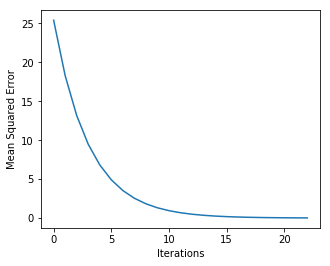

In [146]:
n_updates = 23
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    print('I:',i)
    print('slop:',slope)
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    print("weights:",weights)
    print('input:', input_data)
    mse = get_mse(input_data, target, weights)
    print('mse:', mse)
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## Backpropagation
You've used gradient descent to optimize weights in a simple model.

Now we'll add a technique called "Back Propagation " to calculate the slope we need to optimize more complex deep learning models
- Just as forward propagation sends input data throught the hiden layers and into the output layer
- Back propagation takes the error from the output layer and propagates it backward throught hidden layers, towards the input layer

- it calculates the necessary slopes sequentially from the weights closest to the prediction, we use these slopes to updata your weights 


<img src="images/Back_propagation.PNG" style="width:650px;height:300px;">  

Each time you generate predictions using forward propagation, you update the weights using backward propagation.

<img src="images/Relationship.PNG" style="width:650px;height:300px;">  

 In this situation, the updates to all weights in the network would indeed also be 0
 
<img src="images/s1.PNG" style="width:650px;height:300px;">  

## Backpropagation in practice
Back propagation in a deeper network 
- Start a last set of weights(1,2), we multiply 3 things
    - The node values feeding into these weights are (1, 3) 
    - the relevent slope for the output node is 2 times the error that is 6 
<img src="images/s3.PNG" style="width:650px;height:300px;">  

In [147]:
input_data = np.array([1, 3])
target     = 4
weights    = np.array([1, 2])  

In [153]:
# Set the learning rate: learning_rate
learning_rate = 0.01
    
# Calculate the predictions: preds
preds = (weights * input_data).sum()
    
# Calculate the error: error
error = preds - target
print('Error:',error)    
# Calculate the slope: slope
slope = 2 * input_data * error
print('Slope:',slope)    

Error: 3
Slope: [ 6 18]


The slope we just calculated feed into the formula associated with weights further back in the network.
Let's do that calculation one layer back now 
- This graph uses white to denote node values, Black to denote weights values and red shows the calculated slopes of the loss function, with respect to that node

<img src="images/s4.PNG" style="width:650px;height:300px;">  
-----
<img src="images/s5.PNG" style="width:650px;height:300px;"> 

<img src="images/s6.PNG" style="width:650px;height:300px;"> 


## A round of backpropagation
In the network shown below, we have done forward propagation, and node values calculated as part of forward propagation are shown in white. The weights are shown in black. Layers after the question mark show the slopes calculated as part of back-prop, rather than the forward-prop values. Those slope values are shown in purple.

This network again uses the ReLU activation function, so the slope of the activation function is 1 for any node receiving a positive value as input. Assume the node being examined had a positive value (so the activation function's slope is 1).

<img src="images/s7.PNG" style="width:650px;height:300px;"> 

## Hint
- Recall the three things you need to multiply to get slopes associated with any weight:
 - Value at the node feeding into the weight.
 - The slope of the activation function for the node being fed into.
 - The slope of the loss function with respect to the output node.
 
The slope needed to update this weight is indeed 6.

## 3 Building deep learning models with keras
In this chapter, you'll use the keras library to build deep learning models for both regression as well as classification! You'll learn about the Specify-Compile-Fit workflow that you can use to make predictions and by the end of this chapter, you'll have all the tools necessary to build deep neural networks!

<img src="images/s8.PNG" style="width:650px;height:300px;"> 

## Creating a Keras model
The keras workflow has 4 steps -
 - First, you specify the architecture, like 
     - how many layers do you want?
     - how many nodes in each layer?
     - What activation function do you want to use in each layer ?
 - Compile model 
     - This specifies the loss function, and some details about how optimization works.
 - Fit the model
     - Which is that cycle of back-propagation and optimization of model weights with your data.
 - Predict
     - Finally you will want to use your model to make predictions

First,
This code has three blocks.
- First, We import what we need
- The second block of two lines reads the data, we read the data here So we can find the number of nodes in the input layer

We always need to specify how many columns are in the input when building a keras model, because that is the number of nodes in the input layer
- We then strat building the model
    - the first line of model specification is model = Sequential.
    - There are two ways to build a model, and we will focus on sequential, which is the easier way to build a model
    - Sequential models require that each layer has weights or connections only to the one layer coming directly after it in the network diagram
    - we start adding the layers using the add method of the model, the standard layer type, is called a dense layer.
    - It's is called dense because all of the nodes in the previous layer connect to all of the nodes in the current layer.
        - in each layer we specify the number of nodes as the frst positional argument and the activation function we want to use 

<img src="images/s9.PNG" style="width:650px;height:300px;"> 

## Understanding your data
- You will soon start building models in Keras to predict wages based on various professional and demographic factors. Before you start building a model, it's good to understand your data by performing some exploratory analysis.
- The data is pre-loaded into a pandas DataFrame called df. Use the .head() and .describe() methods in the IPython Shell for a quick overview of the DataFrame.
- The target variable you'll be predicting is wage_per_hour. Some of the predictor variables are binary indicators, where a value of 1 represents True, and 0 represents False.
- Of the 9 predictor variables in the DataFrame, how many are binary indicators? The min and max values as shown by .describe() will be informative here. How many binary indicator predictors are there?

## Specifying a model
- Now you'll get to work with your first model in Keras, and will immediately be able to run more complex neural network models on larger datasets compared to the first two chapters.
- To start, you'll take the skeleton of a neural network and add a hidden layer and an output layer. You'll then fit that model and see Keras do the optimization so your model continually gets better.
- As a start, you'll predict workers wages based on characteristics like their industry, education and level of experience. You can find the dataset in a pandas dataframe called df. For convenience, everything in df except for the target has been converted to a NumPy matrix called predictors. The target, wage_per_hour, is available as a NumPy matrix called target.
- For all exercises in this chapter, we've imported the Sequential model constructor, the Dense layer constructor, and pandas.


## Instructions
- Store the number of columns in the predictors data to n_cols. This has been done for you.
- Start by creating a Sequential model called model.
- Use the .add() method on model to add a Dense layer.
    - Add 50 units, specify activation='relu', and the input_shape parameter to be the tuple (n_cols,) which means it has n_cols items in each row of data, and any number of rows of data are acceptable as inputs.
- Add another Dense layer. This should have 32 units and a 'relu' activation.
- Finally, add an output layer, which is a Dense layer with a single node. Don't use any activation function here.

In [2]:
path = 'C:\\Users\\kavya\\Desktop\\Deep Learning in Python\\Datasets\\'

In [62]:
df = pd.read_csv(path+'Hourly wages.csv',index_col=False)
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [63]:
predictors = df.iloc[:,1:].values
predictors.shape


(534, 9)

In [64]:
target = df.iloc[:,0].values
target.shape

(534,)

In [32]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50,activation= 'relu',input_shape = (n_cols,)))

# Add the second layer
model.add(Dense(32,activation= 'relu'))

# Add the output layer
model.add(Dense(1))


## Compiling and fitting a model 
The compile methods have two important methods for you to choose
  - The first is what optimiazer to use, which control the learning rate.
      - in pratice, the right choice of learning rate can make a big difference for how quickly our model finds weights, and even how good a set of weights it can find 
  -  there are few algorithms that automatically tune the learning rate 
  - "Adam " ia usually a good choice as you go to optimaizer.
Loss Function.
    - Mean Square Error is the most common choice for regression problems.
Fitting a model means, Applying backpropagation and gradient descent with your data to update the weights
    - scaling data before fitting can ease optimization 

## Compiling the model
- You're now going to compile the model you specified earlier. To compile the model, you need to specify the optimizer and loss function to use. In the video, Dan mentioned that the Adam optimizer is an excellent choice. You can read more about it as well as other keras optimizers here, and if you are really curious to learn more, you can read the original paper that introduced the Adam optimizer.

- https://arxiv.org/abs/1412.6980v8

- https://keras.io/optimizers/#adam

## Instructions

- Compile the model using model.compile(). Your optimizer should be 'adam' and the loss should be 'mean_squared_error'.





In [33]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer= 'adam',loss= 'mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


## Fitting the model
- You're at the most fun part. You'll now fit the model. Recall that the data to be used as predictive features is loaded in a NumPy matrix called predictors and the data to be predicted is stored in a NumPy matrix called target. Your model is pre-written and it has been compiled with the code from the previous exercise.

## Instructions

- Fit the model. Remember that the first argument is the predictive features (predictors), and the data to be predicted (target) is the second argument.

In [65]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(predictors,target)


Epoch 1/1
534/534 [==============================] - 1s 1ms/step - loss: 27.1792


## Classification models
- Deep learning works similarly for classification, that is for predicting outcomes from a set of discreate options 

For Classification, you do a couple of things differently, the biggest changes are 
    - First, set the loss function as "categorical_crossentropy" instead of 'mean_square-error'.
    - this isn't the only possible loss function for classification problems, but it is by far the most common.
    - For categorical_crossentropy loss function a lower score is better
    - Add metrics = ['Accuracy'] to compile step for easy-to- understand diagnostic.
    - The softmax activation function ensures the prediction sum to 1, so they can be interpreted like probilitys
    

<img src="images/s10.PNG" style="width:650px;height:300px;"> 

## Last steps in classification models
- You'll now create a classification model using the titanic dataset, which has been pre-loaded into a DataFrame called df. You'll take information about the passengers and predict which ones survived.
- The predictive variables are stored in a NumPy array predictors. The target to predict is in df.survived, though you'll have to manipulate it for keras. The number of predictive features is stored in n_cols.
- you'll use the 'sgd' optimizer, which stands for Stochastic Gradient Descent. 
    - https://en.wikipedia.org/wiki/Stochastic_gradient_descent
    
## Instructions

- Convert df.survived to a categorical variable using the to_categorical() function.
- Specify a Sequential model called model.
- Add a Dense layer with 32 nodes. Use 'relu' as the activation and (n_cols,) as the input_shape.
- Add the Dense output layer. Because there are two outcomes, it should have 2 units, and because it is a classification model, the activation should be 'softmax'.
- Compile the model, using 'sgd' as the optimizer, 'categorical_crossentropy' as the loss function, and metrics=['accuracy'] to - see the accuracy (what fraction of predictions were correct) at the end of each epoch.
- Fit the model using the predictors and the target.

In [104]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

In [105]:
df = pd.read_csv(path+'Titanic.csv')
df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [103]:
df.shape

(891, 11)

In [106]:
predictors = df.drop(['survived'],axis =1).values
predictors.shape

(891, 10)

In [107]:
target = to_categorical(df.survived)
target.shape


(891, 2)

In [110]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(df.survived)

n_cols = predictors.shape[1]

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
model.fit(predictors,target)


Epoch 1/1
891/891 [==============================] - 18s 20ms/step - loss: 2.8043 - acc: 0.5926


## Making predictions
- The trained network from your previous coding exercise is now stored as model. New data to make predictions is stored in a NumPy array as pred_data. Use model to make predictions on your new data.

- In this exercise, your predictions will be probabilities, which is the most common way for data scientists to communicate their predictions to colleagues.

## Instructions
- Create your predictions using the model's .predict() method on pred_data.
- Use NumPy indexing to find the column corresponding to predicted probabilities of survival being True. This is the second column (index 1) of predictions. Store the result in predicted_prob_true and print it.

In [117]:
pred_data = np.array([[2, 34.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 31.0, 1, 1, 26.25, 0, False, 0, 0, 1],
       [1, 11.0, 1, 2, 120.0, 1, False, 0, 0, 1],
       [3, 0.42, 0, 1, 8.5167, 1, False, 1, 0, 0],
       [3, 27.0, 0, 0, 6.975, 1, False, 0, 0, 1],
       [3, 31.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [1, 39.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 7.775, 0, False, 0, 0, 1],
       [2, 39.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 33.0, 1, 0, 53.1, 0, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8875, 1, False, 0, 0, 1],
       [3, 39.0, 0, 0, 24.15, 1, False, 0, 0, 1],
       [2, 35.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 6.0, 4, 2, 31.275, 0, False, 0, 0, 1],
       [3, 30.5, 0, 0, 8.05, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 0.0, 1, True, 0, 0, 1],
       [3, 23.0, 0, 0, 7.925, 0, False, 0, 0, 1],
       [2, 31.0, 1, 1, 37.0042, 1, False, 1, 0, 0],
       [3, 43.0, 0, 0, 6.45, 1, False, 0, 0, 1],
       [3, 10.0, 3, 2, 27.9, 1, False, 0, 0, 1],
       [1, 52.0, 1, 1, 93.5, 0, False, 0, 0, 1],
       [3, 27.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [1, 38.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 27.0, 0, 1, 12.475, 0, False, 0, 0, 1],
       [3, 2.0, 4, 1, 39.6875, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 6.95, 1, True, 0, 1, 0],
       [3, 29.69911764705882, 0, 0, 56.4958, 1, True, 0, 0, 1],
       [2, 1.0, 0, 2, 37.0042, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
       [1, 62.0, 0, 0, 80.0, 0, False, 0, 0, 0],
       [3, 15.0, 1, 0, 14.4542, 0, False, 1, 0, 0],
       [2, 0.83, 1, 1, 18.75, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 23.0, 0, 0, 7.8542, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 8.3, 1, False, 0, 0, 1],
       [1, 39.0, 1, 1, 83.1583, 0, False, 1, 0, 0],
       [3, 21.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [3, 32.0, 0, 0, 56.4958, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 29.7, 1, True, 1, 0, 0],
       [3, 20.0, 0, 0, 7.925, 1, False, 0, 0, 1],
       [2, 16.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [1, 30.0, 0, 0, 31.0, 0, False, 1, 0, 0],
       [3, 34.5, 0, 0, 6.4375, 1, False, 1, 0, 0],
       [3, 17.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 42.0, 0, 0, 7.55, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 1, True, 0, 0, 1],
       [3, 35.0, 0, 0, 7.8958, 1, False, 1, 0, 0],
       [2, 28.0, 0, 1, 33.0, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 1, 0, 89.1042, 0, True, 1, 0, 0],
       [3, 4.0, 4, 2, 31.275, 1, False, 0, 0, 1],
       [3, 74.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [3, 9.0, 1, 1, 15.2458, 0, False, 1, 0, 0],
       [1, 16.0, 0, 1, 39.4, 0, False, 0, 0, 1],
       [2, 44.0, 1, 0, 26.0, 0, False, 0, 0, 1],
       [3, 18.0, 0, 1, 9.35, 0, False, 0, 0, 1],
       [1, 45.0, 1, 1, 164.8667, 0, False, 0, 0, 1],
       [1, 51.0, 0, 0, 26.55, 1, False, 0, 0, 1],
       [3, 24.0, 0, 3, 19.2583, 0, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 41.0, 2, 0, 14.1083, 1, False, 0, 0, 1],
       [2, 21.0, 1, 0, 11.5, 1, False, 0, 0, 1],
       [1, 48.0, 0, 0, 25.9292, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 0, True, 0, 0, 1],
       [2, 24.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 42.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [2, 27.0, 1, 0, 13.8583, 0, False, 1, 0, 0],
       [1, 31.0, 0, 0, 50.4958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 9.5, 1, True, 0, 0, 1],
       [3, 4.0, 1, 1, 11.1333, 1, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [1, 47.0, 1, 1, 52.5542, 0, False, 0, 0, 1],
       [1, 33.0, 0, 0, 5.0, 1, False, 0, 0, 1],
       [3, 47.0, 0, 0, 9.0, 1, False, 0, 0, 1],
       [2, 28.0, 1, 0, 24.0, 0, False, 1, 0, 0],
       [3, 15.0, 0, 0, 7.225, 0, False, 1, 0, 0],
       [3, 20.0, 0, 0, 9.8458, 1, False, 0, 0, 1],
       [3, 19.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [1, 56.0, 0, 1, 83.1583, 0, False, 1, 0, 0],
       [2, 25.0, 0, 1, 26.0, 0, False, 0, 0, 1],
       [3, 33.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 22.0, 0, 0, 10.5167, 0, False, 0, 0, 1],
       [2, 28.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 25.0, 0, 0, 7.05, 1, False, 0, 0, 1],
       [3, 39.0, 0, 5, 29.125, 0, False, 0, 1, 0],
       [2, 27.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 19.0, 0, 0, 30.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 2, 23.45, 0, True, 0, 0, 1],
       [1, 26.0, 0, 0, 30.0, 1, False, 1, 0, 0],
       [3, 32.0, 0, 0, 7.75, 1, False, 0, 1, 0]])

In [118]:
pred_data.shape

(91, 10)

In [119]:
# Specify, compile, and fit the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target)

# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

Epoch 1/1
891/891 [==============================] - 2s 2ms/step - loss: 2.1244 - acc: 0.5802
[1.3709150e-01 9.8243570e-01 1.0000000e+00 7.7027684e-01 3.9335679e-02
 2.6668519e-02 1.0391556e-03 2.5440204e-01 6.1351918e-02 9.9999356e-01
 6.5029927e-02 8.0872411e-01 4.8236165e-02 9.9973947e-01 3.2224126e-02
 4.5940056e-03 1.2714952e-01 9.9910057e-01 2.5004002e-03 9.9844861e-01
 1.0000000e+00 7.2818942e-02 1.2237437e-03 2.6627579e-01 9.9998581e-01
 3.1446423e-02 9.9999630e-01 9.9995875e-01 4.1393712e-02 9.9999988e-01
 9.0148002e-01 9.9194193e-01 3.9915580e-02 1.0513721e-01 2.5837374e-01
 1.0000000e+00 1.8796095e-01 3.9767854e-02 9.9999499e-01 9.9535924e-01
 1.7208377e-01 6.1523873e-01 9.9689984e-01 1.2687515e-02 3.2709146e-01
 3.9079199e-03 1.0000000e+00 1.9363683e-02 9.9748898e-01 1.0000000e+00
 9.9973553e-01 3.3886485e-05 9.4588780e-01 9.9995518e-01 8.7090182e-01
 3.5440418e-01 1.0000000e+00 6.6937685e-01 9.0868419e-01 3.9915580e-02
 7.2758310e-02 5.3499186e-01 7.6978141e-01 1.0000000e+

## Fine-tuning keras models
Here, you'll learn how to optimize your deep learning models in keras. You'll learn how to validate your models, understand the concept of model capacity, and experiment with wider and deeper networks.

## Understanding model optimization
* You probably don't have a great intuition for how to choose things like model architecture and model optimization arguments 
- In practice, optimization is a hard problem.
- the optimal value for any one weight depends on the values of the other weights, and we are optimizing many weights at once.'
- Even if the slope tells us which weights to increase, and which weight to decrease our updates will not improve your model meaningfully.
- A small learning rate might cause us to make such small update's to the model weights that your model doesn't improve materially.
- A very large learning rate might take us too far in the direction that seemed good.
- A smart optimzer like "Adam" helps, but optimazatoin problem can still occur.

The easiest way to see the effect of different learning rates is to use the simplest optimizer, Stochastic  Gradient Decent, some times abbreviated to SGD
   - This optimizer uses a fixed learning rate, learning rate around 0.01 are common, but you can specify the learning rate you need with lr argument.
   - we have a new function that create a new model here.
   
<img src="images/s14.PNG" style="width:650px;height:300px;">   

We create models in a for loop, and each time around we complile model using SGD with a different learning rate 
we pass in the optimizer with the same argument where we previously passed the string "Adam" 

<img src="images/s15.PNG" style="width:650px;height:300px;"> 

## "dying - neuron"

Even if your learning rate is well tuned, you can run into the so called "dying - neuron" problem
    - This problem occurs when a neuran takes a value less than 0 for all rows of your data.
    - Recall that, with ReLU activation function, any node with a negative input value produces a output of 0, and it also has a slope of 0 as you see in the graph
    - Because the slope is 0, the slope of any weights flowing into that node are also 0.

<img src="images/s16.PNG" style="width:650px;height:300px;"> 

All the options listed could prevent a model from showing an improved loss in its first few epochs.'

<img src="images/s17.PNG" style="width:650px;height:300px;"> 
    

## Changing optimization parameters
- It's time to get your hands dirty with optimization. You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.
- For these exercises, we've pre-loaded the predictors and target values from your previous classification models (predicting who would survive on the Titanic). You'll want the optimization to start from scratch every time you change the learning rate, to give a fair comparison of how each learning rate did in your results. So we have created a function get_new_model() that creates an unoptimized model to optimize.

## Instructions
- Import SGD from keras.optimizers.
- Create a list of learning rates to try optimizing with called lr_to_test. The learning rates in it should be .000001, 0.01, and 1.
- Using a for loop to iterate over lr_to_test:
    - Use the get_new_model() function to build a new, unoptimized model.
    - Create an optimizer called my_optimizer using the SGD() constructor with keyword argument lr=lr.
    - Compile your model. Set the optimizer parameter to be the SGD object you created above, and because this is a classification problem, use 'categorical_crossentropy' for the loss parameter.
    - Fit your model using the predictors and target.



In [122]:
input_shape = (10,)
def get_new_model(input_shape = input_shape):
 model = Sequential()
 model.add(Dense(100, activation='relu', input_shape = input_shape))
 model.add(Dense(100, activation='relu'))
 model.add(Dense(2, activation='softmax'))
 return(model)

In [123]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001,0.01,1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors,target)
    



Testing model with learning rate: 0.000001

Epoch 1/1
891/891 [==============================] - 32s 36ms/step - loss: 1.0927


Testing model with learning rate: 0.010000

Epoch 1/1
891/891 [==============================] - ETA: 3s - loss: 2.8318  - 5s 5ms/step - loss: 2.1702


Testing model with learning rate: 1.000000

Epoch 1/1
891/891 [==============================] - 2s 3ms/step - loss: 9.6924


## Model validation
You may recall previous machine learning classes that your model's performance on the training data is not a good indication of how it will perform on new data

For this reason we use validation data to test model performance 

## Validation data
- Validation data is data that is explicitly held out from training, and used only to test model performance.
you may already be familiar with K-fold cross validation.
- In practice, few people run K-fold cross validation on deep learning models because deep learning is typically used on large datasets
- So the computational expense of running k-fold validation would be large, and we usually trust a score from a single validation run because those validation runs are reasonably large

<img src="images/s18.PNG" style="width:650px;height:300px;"> 

Keras makes it easy to use some of your data as validation data, where we specify the split using keyword argument "Validation split" when calling the "fit " method.

    _ in classification model metrics is accuracy 
    
<img src="images/s19.PNG" style="width:650px;height:300px;"> 

## Early Stopping

Our goal is to have the best validation score possible, so we should keep training while validation score is improving, and then stop training when the validation score isn't improving we do this using called "Early stoping".
- The monitor takes an argument called patience, which is how many Epics the model can go without improving before we stop training 

<img src="images/s20.PNG" style="width:650px;height:300px;"> 

<img src="images/s22.PNG" style="width:650px;height:300px;"> 

<img src="images/s23.PNG" style="width:650px;height:300px;"> 

## Evaluating model accuracy on validation dataset
- Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as model. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.

## Instructions

- Compile your model using 'adam' as the optimizer and 'categorical_crossentropy' for the loss. To see what fraction of predictions are correct (the accuracy) in each epoch, specify the additional keyword argument metrics=['accuracy'] in model.compile().
- Fit the model using the predictors and target. Create a validation split of 30% (or 0.3). This will be reported in each epoch.

In [124]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer= 'adam',loss= 'categorical_crossentropy',metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target,validation_split=0.3)


Train on 623 samples, validate on 268 samples
Epoch 1/1
623/623 [==============================] - 1s 2ms/step - loss: 1.7022 - acc: 0.5329 - val_loss: 0.6994 - val_acc: 0.6791


## Early stopping: Optimizing the optimization
- Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more. Since the optimization stops automatically when it isn't helping, you can also set a high value for epochs in your call to .fit(), as Dan showed in the video.

- The model you'll optimize has been specified as model. As before, the data is pre-loaded as predictors and target.

## Instructions
- Import EarlyStopping from keras.callbacks.
- Compile the model, once again using 'adam' as the optimizer, 'categorical_crossentropy' as the loss function, and metrics=['accuracy'] to see the accuracy at each epoch.
- Create an EarlyStopping object called early_stopping_monitor. Stop optimization when the validation loss hasn't improved for 2 epochs by specifying the patience parameter of EarlyStopping() to be 2.
- Fit the model using the predictors and target. Specify the number of epochs to be 30 and use a validation split of 0.3. In addition, pass [early_stopping_monitor] to the callbacks parameter.

In [125]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer= 'adam',loss= 'categorical_crossentropy',metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience =2)

# Fit the model
model.fit(predictors, target,validation_split=0.3,epochs= 30,callbacks = [early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 2s 3ms/step - loss: 1.0731 - acc: 0.5955 - val_loss: 0.9323 - val_acc: 0.5448
Epoch 2/30
623/623 [==============================] - 0s 117us/step - loss: 0.7498 - acc: 0.6485 - val_loss: 0.6193 - val_acc: 0.6866
Epoch 3/30
623/623 [==============================] - 0s 125us/step - loss: 0.6150 - acc: 0.6822 - val_loss: 0.6429 - val_acc: 0.6754
Epoch 4/30
623/623 [==============================] - 0s 159us/step - loss: 0.6726 - acc: 0.6597 - val_loss: 0.5625 - val_acc: 0.7388
Epoch 5/30
623/623 [==============================] - 0s 137us/step - loss: 0.6024 - acc: 0.6918 - val_loss: 0.5337 - val_acc: 0.7201
Epoch 6/30
623/623 [==============================] - 0s 149us/step - loss: 0.5840 - acc: 0.7111 - val_loss: 0.6853 - val_acc: 0.6381
Epoch 7/30
623/623 [==============================] - 0s 133us/step - loss: 0.5728 - acc: 0.7047 - val_loss: 0.5157 - val_acc: 0.7425
Epoch 8/30
623/623

Because optimization will automatically stop when it is no longer helpful, it is okay to specify the maximum number of epochs as 30 rather than using the default of 10 that you've used so far. Here, it seems like the optimization stopped after 7 epochs.

## Experimenting with wider networks
- Now you know everything you need to begin experimenting with different models!

- A model called model_1 has been pre-loaded. You can see a summary of this model printed in the IPython Shell. This is a relatively small network, with only 10 units in each hidden layer.

- In this exercise you'll create a new model called model_2 which is similar to model_1, except it has 100 units in each hidden layer.

- After you create model_2, both models will be fitted, and a graph showing both models loss score at each epoch will be shown. We added the argument verbose=False in the fitting commands to print out fewer updates, since you will look at these graphically instead of as text.

- Because you are fitting two models, it will take a moment to see the outputs after you hit run, so be patient.

<img src="images/s24.PNG" style="width:650px;height:300px;"> 

## Instructions
- Create model_2 to replicate model_1, but use 100 nodes instead of 10 for the first two Dense layers you add with the 'relu' activation. Use 2 nodes for the Dense output layer with 'softmax' as the activation.
- Compile model_2 as you have done with previous models: Using 'adam' as the optimizer, 'categorical_crossentropy' for the loss, and metrics=['accuracy'].
- Hit 'Submit Answer' to fit both the models and visualize which one gives better results! Notice the keyword argument verbose=False in model.fit(): This prints out fewer updates, since you'll be evaluating the models graphically instead of through text.

In [129]:
import matplotlib.pyplot as plt

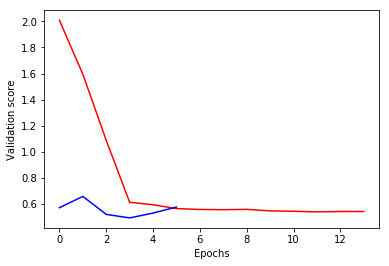

In [138]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)


# Create the new model: model_
model_1 = Sequential()

# Add the first and second layers
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))

# Add the output layer
model_1.add(Dense(2,activation = 'softmax'))

# Compile model_2
model_1.compile(optimizer = 'adam' , loss = 'categorical_crossentropy',metrics=['accuracy'])


# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2,activation = 'softmax'))

# Compile model_2
model_2.compile(optimizer = 'adam' , loss = 'categorical_crossentropy',metrics=['accuracy'])




# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


The blue model is the one you made, the red is the original model. Your model had a lower loss value, so it is the better model.

## Adding layers to a network
- You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

- Once again, you have a baseline model called model_1 as a starting point. It has 1 hidden layer, with 50 units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).

- This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.

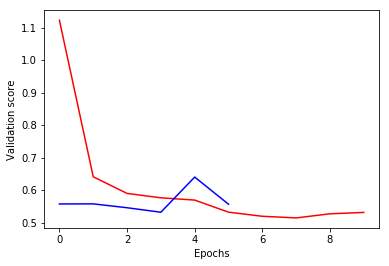

In [141]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

#____________________________________________________model 1 _________________________________
# Create the new model: model_2
model_1 = Sequential()

# Add the first, second, and third hidden layers
model_1.add(Dense(50,activation='relu',input_shape=input_shape))

# Add the output layer
model_1.add(Dense(2,activation='softmax'))

# Compile model_2
model_1.compile(optimizer = 'adam' , loss = 'categorical_crossentropy',metrics=['accuracy'])
#________________________________________________________________________________________________

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50,activation='relu',input_shape=input_shape))
model_2.add(Dense(50,activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2,activation='softmax'))

# Compile model_2
model_2.compile(optimizer = 'adam' , loss = 'categorical_crossentropy',metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


The blue model is the one you made and the red is the original model. The model with the lower loss value is the better model.

## Thinking about model capacity
However, it takes some practice to get an intution for what experiments are architecture to try 

## Model Capacity 
But some thing called "Model capacity " should be one of the key consideration you think about when deciding what models to try
    - "Model capacity" or "network capacity" is closely releated to the terms overfitting and underfitting.
    - Model capacity is a model's ability to capture predictive patterns in your data.So the more capacity a model, the further to the right we will be on this graph 
If you had a network, and you increased the number of nodes or neurons in a hidden layer, that would increase model capacity if you add layer that also increases model capacity

<img src="images/s25.PNG" style="width:650px;height:300px;"> 

<img src="images/s26.PNG" style="width:650px;height:300px;"> 

## Experimenting with model structures

<img src="images/s27.PNG" style="width:650px;height:300px;"> 

Increasing the number of units in each hidden layer would be a good next step to try achieving even better performance.

Stepping up to images
Building your own digit recognition model

- You've reached the final exercise of the course - you now know everything you need to build an accurate model to recognize handwritten digits!

- We've already done the basic manipulation of the MNIST dataset shown in the video, so you have X and y loaded and ready to model with. Sequential and Dense from keras are also pre-imported.

- To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex.

- If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve computation time. If you don't have a GPU, no problem! You can set up a deep learning environment in the cloud that can run your models on a GPU. Here is a blog post by Dan that explains how to do this - check it out after completing this exercise! It is a great next step as you continue your deep learning journey.

Instructions



In [147]:
df = pd.read_csv(path+"MNIST.CSV")

In [149]:
df.shape

(1890, 785)

In [152]:
X = df.iloc[:,1:]
X.shape

(1890, 784)

In [ ]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50,activation = 'relu',input_shape = (784,)))

# Add the second hidden layer
model.add(Dense(50,activation = 'relu'))

# Add the output layer
model.add(Dense(10,activation = 'softmax'))

# Compile the model
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy',metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3)
